# ZILLOW DATASET TIME SERIES

##  Introduction

## Business Overview

Real Estate Investment Firms provide comprehensive investment advisory services, including market research, property analysis, due diligence, financial modeling, and portfolio management. My goal is to optimize investment decisions, mitigate risks, and ensure long-term success.

The primary focus of this project is to identify opportunities in real estate markets and capitalize them to generate significant profits. I will carefully assess and mitigate risks associated with each investment based on some factors like market volatility.I will also conduct a market analysis to identify areas of high demand and growth for optimal investment and prioritize investments with the potential substantial returns based on factors like property appreciation and market demand.

With long term value our investement strategies will focus on the ability to generate consistent cashflows overtime. Real Estate Firms can achieve a long-term partnerships with clients by achieving their financial objectives through successful real estate investments.

## Problem Statement

At Matawi Real Estate Investment firm, the key problem is to identify the top five areas that present the best investment opportunities in the real estate market. The firm aims to maximize return on investment by strategically selecting areas with strong growth potential and favorable real estate market conditions.

To address this problem, the firm needs to leverage data from trusted sources like Zillow Research and conduct a comprehensive analysis of various factors. These factors include past price trends, growth rates, market demand, and other relevant indicators to determine the areas with the highest potential for future price appreciation.

By making data-driven investment decisions based on the analysis, the firm aims to optimize its investment portfolio and achieve maximum returns for its clients.

## Objectives 

Main objective:

  - The main objective is to develop a forecasting model that can accurately predict real estate price movements in different       areas and assist in identifying the most favorable locations for investment between the period of April 1996 to April 2018.
  
Specific objectives:

  - To assess and mitigate potential risks associated with market volatility and economic fluctuations.
  - To Utilize time series analysis techniques to identify underlying patterns, trends, and seasonality in the real estate price    data.
  - To Build a time series predictive model that can forecast real estate prices.
  - To Evaluate the forecasting model's performance by comparing its predictions against actual real estate prices
  - To forecast house prices in the next subsequent years.

## Success Metrics

In this project, I will determine the best model for my analysis by considering three important metrics: AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and RMSE (Root Mean Square Error). These metrics will allow us to assess the goodness of fit and predictive performance of different models.

**AIC (Akaike Information Criterion):**

**Target:** Aim for a lower AIC value compared to alternative models. Success Criterion: Achieve a minimum reduction in AIC value of at least 5% compared to the next best-performing model.

**BIC (Bayesian Information Criterion):**

**Target:** Aim for a lower BIC value compared to alternative models. Success Criterion: Achieve a minimum reduction in BIC value of at least 5% compared to the next best-performing model.

**RMSE (Root Mean Square Error):**

**Target:** Aim for a lower RMSE value, indicating a smaller difference between predicted and observed values. Success Criterion: Achieve an RMSE value that is below a certain threshold, such as a 10% deviation from the average observed real estate prices.

## Data Understanding

The dataset used in this project consists of historic median house prices from various regions in the USA. It covers a time period of 22 years, specifically from April 1996 to April 2018. The dataset was obtained from the Zillow website.

Here are the key details about the dataset:

  - It contains 14,723 rows and 272 columns.
  - Out of the 272 columns, 4 columns are categorical, while the rest are numerical. 
  
The columns are described as follows:

 - RegionID: A unique identifier for each region.

 - RegionName: The names of the regions, represented by zip codes.

 - City: The corresponding city names for each region.

 - State: The names of the states where the regions are located.

 - Metro: The names of the metropolitan areas associated with the regions.

 - County Name: The names of the counties where the regions are situated.

 - Size Rank: The ranking of the zip codes based on urbanization.

 - Date Columns (265 Columns): These columns represent different dates and provide median house prices for each region over the years.

In [1]:
# Imported necessary libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


import warnings
warnings.filterwarnings('ignore')

print('succesfully imported libaries....')

succesfully imported libaries....


## Data Preparation

In [2]:
# Loading the dataset
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
# A function to to analyze the shape, number of columns, and information of the dataset
def analyze_dataset(df):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", df.shape)
    print('\n-----------------------------------------------------------')

    # Output the column names of the dataset
    print("Column names:", list(df.columns))
    print('\n-----------------------------------------------------------')

    # Output information about the dataset
    print(df.info())
    print('\n-----------------------------------------------------------')

    # output descriptive statistics about the dataset
    print(df.describe())
    print('\n-----------------------------------------------------------')


In [4]:
# calling the function
analyze_dataset(df)

Shape of dataset: (14723, 272)

-----------------------------------------------------------
Column names: ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '

- The dataset has 14723 rows and 272 columns,4 categorical and the rest are numerical

## Data Cleaning

In [5]:
# Checking for duplicates and missing data in the dataset
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [6]:
# Calling the function
cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

In [7]:
# creating a dataframe to display the column datatypes and unique values
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
    ])

pd.DataFrame(data = desc, columns=['Feature','Dtypes','Sample_Unique'])

,Feature,Dtypes,Sample_Unique
0,RegionID,int64,14723
1,RegionName,int64,14723
2,City,object,7554
3,State,object,51
4,Metro,object,701
...,...,...,...
267,2017-12,int64,5248
268,2018-01,int64,5276
269,2018-02,int64,5303
270,2018-03,int64,5332


In [8]:
# Defined a function to  calculate the percentage of missing values in the dataset
def missing_values_percentage(df):
    # Calculating the total number of missing values in the Dataframe
    total_missing = df.isnull().sum().sum()

    # checking the total number of cells in the DataFrame
    total_cells = df.size

    # calculating the percentage of missing values
    percentage_missing = (total_missing / total_cells) * 100
    
    return percentage_missing

missing_values_percentage(df)

3.943759463983923

- Missing values are 3.94% of the entire dataset. Lets go ahead and preview the percentage of missing values per each individual column

In [9]:
# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Print the list of columns in the DataFrame along with their missing percentages
for column in missing_values.index:
    # Print the column name followed by its corresponding missing percentage
    print(column, missing_values[column])


RegionID 0.0
RegionName 0.0
City 0.0
State 0.0
Metro 7.084154044691979
CountyName 0.0
SizeRank 0.0
1996-04 7.056985668681655
1996-05 7.056985668681655
1996-06 7.056985668681655
1996-07 7.056985668681655
1996-08 7.056985668681655
1996-09 7.056985668681655
1996-10 7.056985668681655
1996-11 7.056985668681655
1996-12 7.056985668681655
1997-01 7.056985668681655
1997-02 7.056985668681655
1997-03 7.056985668681655
1997-04 7.056985668681655
1997-05 7.056985668681655
1997-06 7.056985668681655
1997-07 7.050193574679074
1997-08 7.050193574679074
1997-09 7.050193574679074
1997-10 7.050193574679074
1997-11 7.050193574679074
1997-12 7.050193574679074
1998-01 7.036609386673912
1998-02 7.036609386673912
1998-03 7.036609386673912
1998-04 7.036609386673912
1998-05 7.036609386673912
1998-06 7.036609386673912
1998-07 7.036609386673912
1998-08 7.036609386673912
1998-09 7.036609386673912
1998-10 7.036609386673912
1998-11 7.036609386673912
1998-12 7.036609386673912
1999-01 7.036609386673912
1999-02 7.0366093

- The percentage of the missing values per column is still low, it is ranging from 1%-7% thus i chose to fill the missing values for the metro column with the string  missing then dropping the missing values in the date columns.

In [10]:
# Filling the 'Metro' column with the word 'missing'
df['Metro'].fillna('missing', inplace=True)

# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Handling the date columns' missing values
df.dropna(inplace=True)

# Print the list of columns in the DataFrame along with their missing percentages
for column, percentage in missing_values.items():
    print(f"{column}: {percentage}%")


RegionID: 0.0%
RegionName: 0.0%
City: 0.0%
State: 0.0%
Metro: 0.0%
CountyName: 0.0%
SizeRank: 0.0%
1996-04: 7.056985668681655%
1996-05: 7.056985668681655%
1996-06: 7.056985668681655%
1996-07: 7.056985668681655%
1996-08: 7.056985668681655%
1996-09: 7.056985668681655%
1996-10: 7.056985668681655%
1996-11: 7.056985668681655%
1996-12: 7.056985668681655%
1997-01: 7.056985668681655%
1997-02: 7.056985668681655%
1997-03: 7.056985668681655%
1997-04: 7.056985668681655%
1997-05: 7.056985668681655%
1997-06: 7.056985668681655%
1997-07: 7.050193574679074%
1997-08: 7.050193574679074%
1997-09: 7.050193574679074%
1997-10: 7.050193574679074%
1997-11: 7.050193574679074%
1997-12: 7.050193574679074%
1998-01: 7.036609386673912%
1998-02: 7.036609386673912%
1998-03: 7.036609386673912%
1998-04: 7.036609386673912%
1998-05: 7.036609386673912%
1998-06: 7.036609386673912%
1998-07: 7.036609386673912%
1998-08: 7.036609386673912%
1998-09: 7.036609386673912%
1998-10: 7.036609386673912%
1998-11: 7.036609386673912%
1998-

- There are '0' missing values and '0' duplicated values in the dataset.The dataset doesn't have any missing values or any duplicates. Since region ID is the unique identifier, let's check if there is any duplicates in that column.

In [11]:
# Checking for duplicates in the region ID column only
df[df['RegionID'].duplicated(keep=False)]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


- The data does not have any duplicated ID in the region ID column values

In [12]:
# Defined a function to check and print the value counts for each column in a DataFrame
def check_value_counts(data):
    # Iterate through each column in the DataFrame
    for column in data.columns:
        # Print a message indicating the column name
        print(f'Value counts for {column}:')
        
        # Used the value_counts() function to count unique values in the column and print the result
        print(data[column].value_counts())
        
        # Print a separator line for clarity
        print('------------------------------------------','\n')

# Calling the function
check_value_counts(df)


Value counts for RegionID:
73724    1
72582    1
76672    1
97146    1
91001    1
        ..
62023    1
58806    1
97717    1
60701    1
98304    1
Name: RegionID, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for RegionName:
55324    1
99109    1
47906    1
11040    1
44273    1
        ..
98057    1
89521    1
75182    1
1450     1
65536    1
Name: RegionName, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for City:
New York       104
Los Angeles     93
Houston         86
San Antonio     48
Washington      43
              ... 
Coats            1
La Vernia        1
Rio Grande       1
Almond           1
Glen Arm         1
Name: City, Length: 7046, dtype: int64
------------------------------------------ 

Value counts for State:
CA    1188
NY     985
TX     944
PA     797
FL     765
OH     529
IL     523
NJ     502
MI     453
MA     414
NC     402
TN     399
IN     392
VA     372
MN     344
WA     336
WI    

85100.0     28
90000.0     23
76600.0     23
78200.0     23
92000.0     21
            ..
236600.0     1
266800.0     1
230200.0     1
362800.0     1
214500.0     1
Name: 1999-07, Length: 3067, dtype: int64
------------------------------------------ 

Value counts for 1999-08:
79600.0     21
86000.0     20
75600.0     20
83100.0     19
88600.0     19
            ..
664100.0     1
244100.0     1
860700.0     1
274700.0     1
401800.0     1
Name: 1999-08, Length: 3062, dtype: int64
------------------------------------------ 

Value counts for 1999-09:
85700.0     23
83700.0     23
85800.0     21
102800.0    20
127000.0    20
            ..
292700.0     1
824500.0     1
363100.0     1
595200.0     1
482000.0     1
Name: 1999-09, Length: 3082, dtype: int64
------------------------------------------ 

Value counts for 1999-10:
82900.0     21
68300.0     19
86000.0     19
84600.0     19
86100.0     19
            ..
880700.0     1
314800.0     1
234200.0     1
55100.0      1
310900.0     1
N

Name: 2002-04, Length: 3759, dtype: int64
------------------------------------------ 

Value counts for 2002-05:
130400.0     18
82100.0      17
128800.0     17
79000.0      17
161500.0     16
             ..
232400.0      1
1125100.0     1
585500.0      1
341900.0      1
331700.0      1
Name: 2002-05, Length: 3780, dtype: int64
------------------------------------------ 

Value counts for 2002-06:
126700.0    19
87400.0     19
126600.0    18
79400.0     16
85800.0     16
            ..
237300.0     1
804000.0     1
282600.0     1
498700.0     1
319600.0     1
Name: 2002-06, Length: 3803, dtype: int64
------------------------------------------ 

Value counts for 2002-07:
76100.0     19
83000.0     18
133200.0    16
99400.0     16
98700.0     15
            ..
274100.0     1
380600.0     1
404000.0     1
35900.0      1
413600.0     1
Name: 2002-07, Length: 3826, dtype: int64
------------------------------------------ 

Value counts for 2002-08:
89900.0     17
79700.0     16
109000.0    

Name: 2005-05, Length: 4888, dtype: int64
------------------------------------------ 

Value counts for 2005-06:
90100.0     15
92900.0     15
108500.0    14
157000.0    14
85800.0     13
            ..
941800.0     1
630500.0     1
444400.0     1
462700.0     1
358200.0     1
Name: 2005-06, Length: 4918, dtype: int64
------------------------------------------ 

Value counts for 2005-07:
129800.0    15
84800.0     14
136000.0    14
136600.0    13
111100.0    13
            ..
354900.0     1
948000.0     1
611500.0     1
440800.0     1
397300.0     1
Name: 2005-07, Length: 4940, dtype: int64
------------------------------------------ 

Value counts for 2005-08:
85100.0     15
85300.0     15
151200.0    14
151100.0    13
108600.0    13
            ..
582000.0     1
611400.0     1
461800.0     1
375400.0     1
409600.0     1
Name: 2005-08, Length: 4981, dtype: int64
------------------------------------------ 

Value counts for 2005-09:
151900.0    16
85400.0     14
110100.0    13
130000.0

------------------------------------------ 

Value counts for 2008-06:
122800.0     15
129400.0     14
137300.0     13
214700.0     13
140500.0     13
             ..
1942800.0     1
282700.0      1
663700.0      1
503400.0      1
845700.0      1
Name: 2008-06, Length: 4741, dtype: int64
------------------------------------------ 

Value counts for 2008-07:
138300.0    15
132400.0    14
157700.0    13
154500.0    13
141100.0    13
            ..
944600.0     1
284900.0     1
780800.0     1
923500.0     1
775800.0     1
Name: 2008-07, Length: 4711, dtype: int64
------------------------------------------ 

Value counts for 2008-08:
141000.0    17
146500.0    16
148100.0    15
137200.0    14
124700.0    14
            ..
620900.0     1
395700.0     1
577200.0     1
414600.0     1
380800.0     1
Name: 2008-08, Length: 4683, dtype: int64
------------------------------------------ 

Value counts for 2008-09:
107200.0     15
122300.0     15
126600.0     14
88500.0      14
132600.0     14
    

Name: 2012-06, Length: 4155, dtype: int64
------------------------------------------ 

Value counts for 2012-07:
125000.0     16
115500.0     16
131200.0     15
125800.0     15
70900.0      15
             ..
775900.0      1
374900.0      1
1158600.0     1
1781200.0     1
904000.0      1
Name: 2012-07, Length: 4211, dtype: int64
------------------------------------------ 

Value counts for 2012-08:
120800.0    16
127600.0    16
95100.0     16
87700.0     15
147600.0    15
            ..
490500.0     1
484700.0     1
541800.0     1
694100.0     1
297400.0     1
Name: 2012-08, Length: 4209, dtype: int64
------------------------------------------ 

Value counts for 2012-09:
158700.0     16
130900.0     15
125900.0     15
110500.0     15
110900.0     15
             ..
2123300.0     1
243300.0      1
68700.0       1
793000.0      1
269800.0      1
Name: 2012-09, Length: 4211, dtype: int64
------------------------------------------ 

Value counts for 2012-10:
115200.0    16
127200.0    16
8

118000     14
85000      14
128300     14
97000      14
135400     13
           ..
99900       1
271200      1
467800      1
1310000     1
409600      1
Name: 2016-05, Length: 4898, dtype: int64
------------------------------------------ 

Value counts for 2016-06:
143800    16
122300    14
146900    14
190400    14
128900    14
          ..
548600     1
442100     1
235000     1
392900     1
409600     1
Name: 2016-06, Length: 4905, dtype: int64
------------------------------------------ 

Value counts for 2016-07:
133700    16
131500    14
149100    14
114400    13
158200    13
          ..
552700     1
896000     1
289800     1
706000     1
739700     1
Name: 2016-07, Length: 4931, dtype: int64
------------------------------------------ 

Value counts for 2016-08:
110700     16
121900     15
142700     14
164700     14
166700     14
           ..
767300      1
586500      1
663700      1
446900      1
1013900     1
Name: 2016-08, Length: 4924, dtype: int64
-------------------------

- The dataset  does not have any data inconsistencies

In [13]:
# checking the DataFrame 
print(df)

       RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO            missing   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0

### Data preprocessing

In [14]:
# Renamed the 'RegionName' column to 'ZipCode' in the DataFrame 'df'
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)


In [15]:
# Converted Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')

In [16]:
# Print the minimum value in the 'ZipCode' column of the DataFrame 'df'
print(df.ZipCode.min())

1001


In [17]:
# Filled  the 'ZipCode' column in the DataFrame 'df' with leading zeros to make it a 5-digit string
df['ZipCode'] = df['ZipCode'].str.zfill(5)

- In order to address the issues identified in the business understanding phase, two new columns will be generated ; one for calculating the return on investment (ROI) and another for determining the coefficient of variation. The coefficient of variation measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI.

### Feature Engineering

In [18]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2018-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [19]:
# Displaying the updated dataframe
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1.212474,0.232707
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,1.435814,0.303073
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,1.336252,0.182705
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,2.476714,0.282105


## Explaratory Data Analysis

In [20]:
# Created a new copy of the dataset
melted_df = df.copy()

- The initial dataset comprises 265 columns representing different datetime columns, which can complicate data analysis and visualization tasks. To streamline this, we’ll transform the dataframe into a more manageable format where all datetime columns  are consolidated into a single column and their corresponding values in another. This process, known as “melting” the dataframe, enhances the ease of data manipulation and interpretation.

In [21]:
# Defined a function to melt and process the DataFrame

def melt_data(df):
    # Melt the DataFrame 'df' into a long format
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV'], var_name='time')
    
    # Converted the 'time' column to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    # Dropped rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])
    
    return melted

# Call the 'melt_data' function to process the DataFrame 'melted_df'
melted_df = melt_data(melted_df)




In [22]:
# Displaying the DataFrame
melted_df


,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,2.083782,0.256487,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,0.365295,0.152680,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,0.567966,0.143950,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1.623971,0.237364,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,0.571798,0.178326,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3626255,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.212474,0.232707,2018-04-01,209300.0
3626256,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.435814,0.303073,2018-04-01,225800.0
3626257,40404,75672,14721,Berea,KY,Richmond,Madison,1.336252,0.182705,2018-04-01,133400.0
3626258,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.476714,0.282105,2018-04-01,664400.0


In [23]:
# Calling the function `analyze_dataset` to analyze the shape, number of columns, and information of the dataset
analyze_dataset(melted_df)

Shape of dataset: (3626260, 11)

-----------------------------------------------------------
Column names: ['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV', 'time', 'value']

-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3626260 entries, 0 to 3626259
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     string        
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   ROI         float64       
 8   CV          float64       
 9   time        datetime64[ns]
 10  value       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), string(1)
memory usage: 332.0+ MB
None

-----------------------------------------------------------
           RegionID      SizeRank    

- The new dataset has 3626260 rows and 11 columns.The data is from 4th April 1996 to 4th April 2018.The house with the lowest price has a price of 11300 dollars and the one with the highest price has a price of 8558700 dollars. The highest ROI on a house is 11.2% and the lowest ROI on a house is -53.3%.

## Univariate Analysis

In [24]:
def plot_value_counts(data, columns, top_n=20):
    """
    Plots bar plots of value counts for the specified columns in the given dataset,
    considering only the top_n items.
    Parameters:
    data (DataFrame): The dataset to analyze.
    columns (list): List of column names to plot value counts for.
    top_n (int): Number of top items to consider (default: 20).
    """
    
    # Calculated the number of plots to create
    num_plots = len(columns)
    
    # Defined the number of rows and columns for the subplot grid
    num_rows = 2
    num_cols = 2
    
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    
    # Ensured proper spacing between subplots
    fig.tight_layout()
    
    # Looped through the specified columns and create bar plots
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        # Calculated value counts and selected the top_n items
        value_counts = data[column].value_counts().head(top_n)
        
        # Created a bar plot
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax)
        
        # Set plot title, x-axis label, y-axis label, and x-axis rotation for readability
        ax.set_title(f'Top {top_n} Value Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if there are any
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col])
    
    # Ensured proper layout and displayed the plot
    plt.tight_layout()
    plt.show()


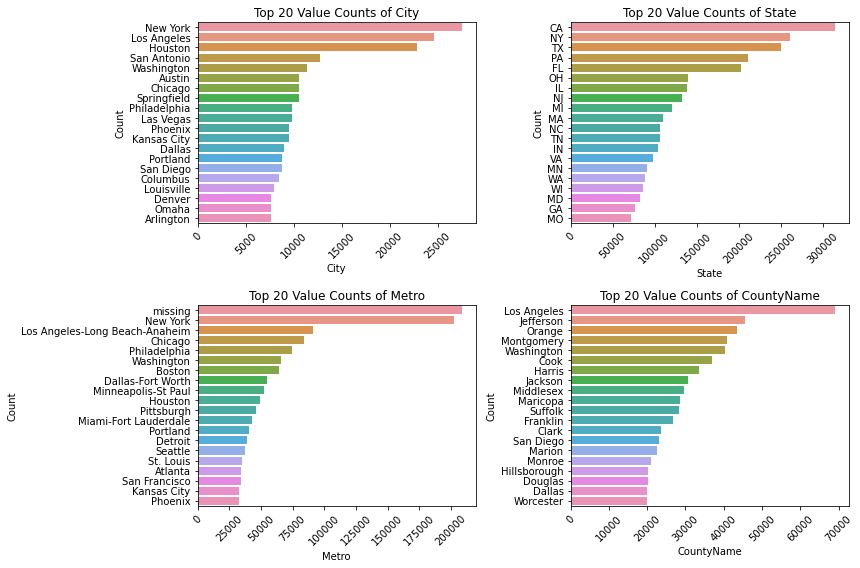

In [25]:
# Defined a list of column names to analyze and plot value counts for
columns_list = ["City", "State", "Metro", "CountyName"]

# Call the 'plot_value_counts' function to generate bar plots for the specified columns
# using the 'melted_df' DataFrame as the dataset
plot_value_counts(melted_df, columns_list)


The top 5 cities, states metro and counties with the highest number of houses are:

- cities: New York, Los Angeles, Houston, San Antonio and Washington
- states: CA, NY, TX,PA,FL
- metro: New York, Los Angeles, Chicago, Philadelphia, Washington
- counties: Los Angeles,Jefferson, Orange, Washington, Montgomery

#### Distribution of columns

In [26]:
# Defined a function to plot the distributions of  columns

def plot_column_distributions(data, columns):
    # Calculated the number of columns to plot
    num_columns = len(columns)
    
    # Created a grid of subplots with 2 columns each (histogram and kernel density plot)
    fig, axes = plt.subplots(num_columns, 2, figsize=(10*2, 6*num_columns))

    # Looped through the specified columns and create distribution plots
    for i, column in enumerate(columns):
        ax1 = axes[i, 0]  # Left subplot for the histogram
        ax2 = axes[i, 1]  # Right subplot for the kernel density plot

        # Plotted a histogram using seaborn
        sns.histplot(data[column], ax=ax1, bins=30, kde=False, edgecolor='black')
        ax1.set_title(f'{column} Distribution (Histogram)', fontsize=16)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)

        # Plotted a kernel density plot using seaborn
        sns.kdeplot(data[column], ax=ax2, fill=True)
        ax2.set_title(f'{column} Distribution (Kernel Density Plot)', fontsize=16)
        ax2.set_xlabel(column, fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)

    # Adjusted the spacing between subplots for better layout
    plt.tight_layout()
    
    # Displayed the plots
    plt.show()


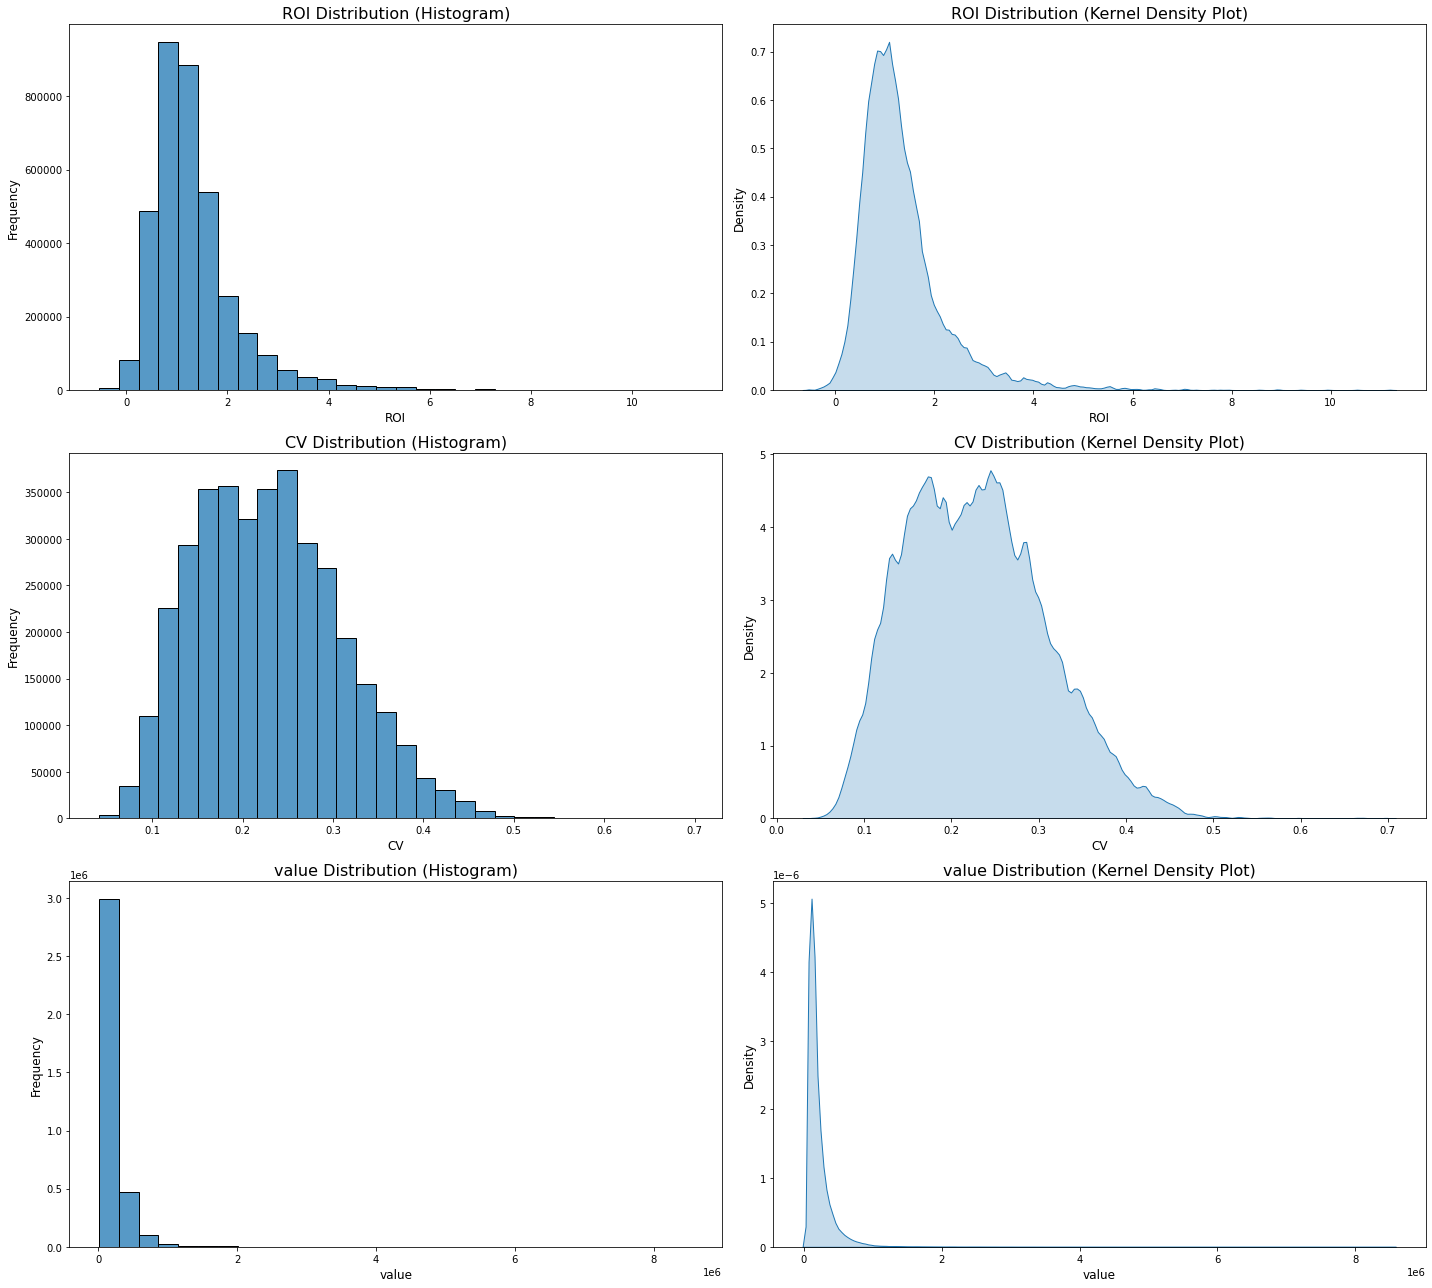

In [27]:
# Defined a list of continuous columns to analyze and plot their distributions
continuous_columns = ['ROI', 'CV', 'value']

# Called  the 'plot_column_distributions' function to create distribution plots
# for the specified continuous columns in the 'melted_df' DataFrame
plot_column_distributions(melted_df, continuous_columns)


- ROI: The distribution is positively skewed.Most of the houses have an ROI between 1% and 2% .It also has a long tail showing that there are outliers, houses with higher ROI impliying higher return.

- Value: The distribution of the house prices is positively skewed showing that most houses are lowly priced and it also has a long tail showing that there are outliers ie the extremely highly priced houses.

- CV: The plot shows that most of the houses have a cv between 0.1 and 0.3 which shows that their prices are close to the mean thus less risk but it also has a long tail showing that there are outliers, houses with higher cv impliying higher risk.

#### Checking for Outliers

IQR for RegionID column: 24320.25
Number of outliers in RegionID column: 26765
IQR for SizeRank column: 7260.5
Number of outliers in SizeRank column: 0
IQR for ROI column: 0.8341421408774268
Number of outliers in ROI column: 195040
IQR for CV column: 0.11609651734251925
Number of outliers in CV column: 14575
IQR for value column: 140900.0
Number of outliers in value column: 275048


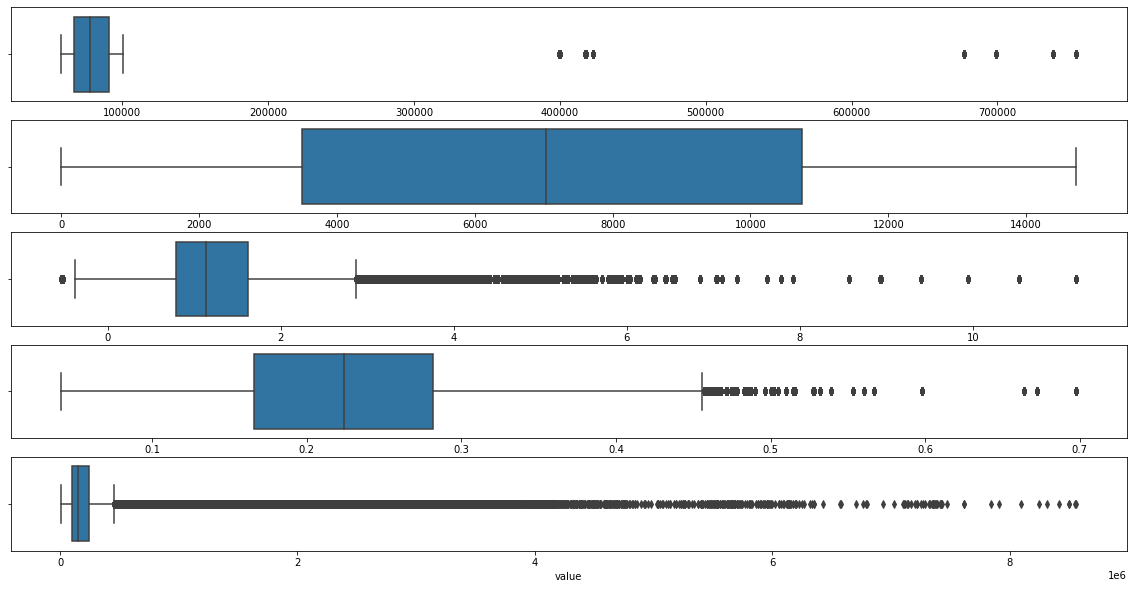

In [28]:
# Defined a function to check for outliers in specified numerical columns

def check_outliers(data, columns):
    # Created subplots for each column to visualize outliers
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20, 10))
    
    # Looped through the specified columns
    for i, column in enumerate(columns):
        # Calculated the interquartile range (IQR) for the column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        
        # Print the IQR for the column
        print("IQR for {} column: {}".format(column, iqr))
        
        # Determined the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        
        # Print the number of outliers for the column
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))
        
        # Created a box plot to visualize the distribution of the column
        sns.boxplot(data=data, x=column, ax=axes[i])
    
    # Displayed the box plots
    plt.show()

# Selected numerical columns from the DataFrame 'melted_df'
num = melted_df.select_dtypes('number')
columns = num.columns

# Calling the 'check_outliers' function to check for outliers in the selected columns
check_outliers(melted_df, columns)


## Bivariate Analysis

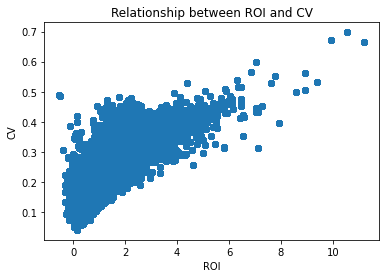

In [29]:
# Defined a function to create a scatter plot

def scatter_plot(x, y, x_label, y_label):
    # Created a scatter plot using the specified x and y data
    plt.scatter(x, y)
    
    # Set the x-axis label
    plt.xlabel(x_label)
    
    # Set the y-axis label
    plt.ylabel(y_label)
    
    # Set the plot title with dynamic labels
    plt.title(f'Relationship between {x_label} and {y_label}')
    
    # Display the plot
    plt.show()

# Calling the 'scatter_plot' function to create a scatter plot
scatter_plot(melted_df['ROI'], melted_df['CV'], 'ROI', 'CV')


- This plot shows the relationship between the return on investment and the coefficient of variation. It shows that the two have a strong positive relationship, that is, that increase in CV leads to increase in ROI and vice versa. This implies that the higher the risk, the higher the return.

- Since the two have such a strong relationship, findings using ROI will be similar to those using CV . Let's examine how the other variables are related to ROI.

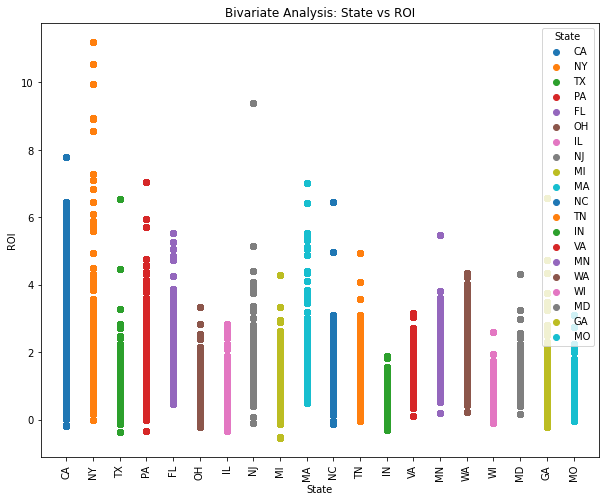

In [30]:
# Defined a function for bivariate analysis and plotting
def plot_bivariate_analysis(data, x_column, y_column, top_n=20):
    # Get the top categories for the x_column based on their frequency
    top_categories = data[x_column].value_counts().nlargest(top_n).index
    
    # Filtered the data to include only rows with top categories in the x_column
    data_top = data[data[x_column].isin(top_categories)]

    # Created a scatter plot for each top category in the x_column
    plt.figure(figsize=(10, 8))
    for category in top_categories:
        # Filtered data for the current category
        category_data = data_top[data_top[x_column] == category]
        
        # Created a scatter plot for the category
        plt.scatter(category_data[x_column], category_data[y_column], label=category)

    # Set plot title, x-axis label, y-axis label, and x-axis rotation
    plt.title(f'Bivariate Analysis: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=90)
    
    # Added a legend to distinguish categories
    plt.legend(title=x_column)
    
    # Displayed the plot
    plt.show()

# Calling the 'plot_bivariate_analysis' function to create a bivariate analysis plot
plot_bivariate_analysis(melted_df, 'State', 'ROI')


- The above plot shows that the state with the highest return on investment is NY.

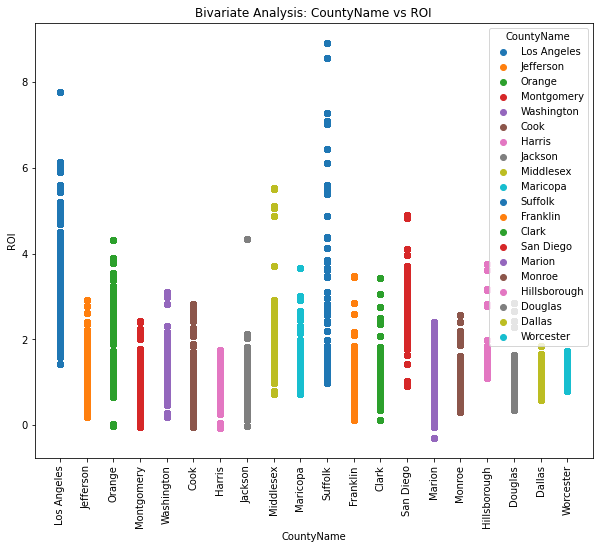

In [31]:
# Called the 'plot_bivariate_analysis' function to create a bivariate analysis plot
plot_bivariate_analysis(melted_df, 'CountyName', 'ROI')


- From  plot the county with the highest ROI is Suffolk.



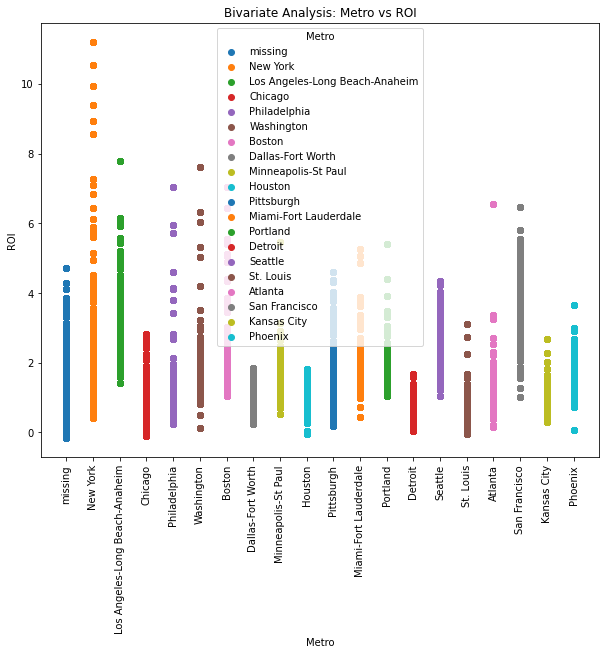

In [32]:
# plotting the bivariate analysis of ROI  against metro

plot_bivariate_analysis(melted_df, 'Metro', 'ROI')

- New York is the metro with the highest ROI

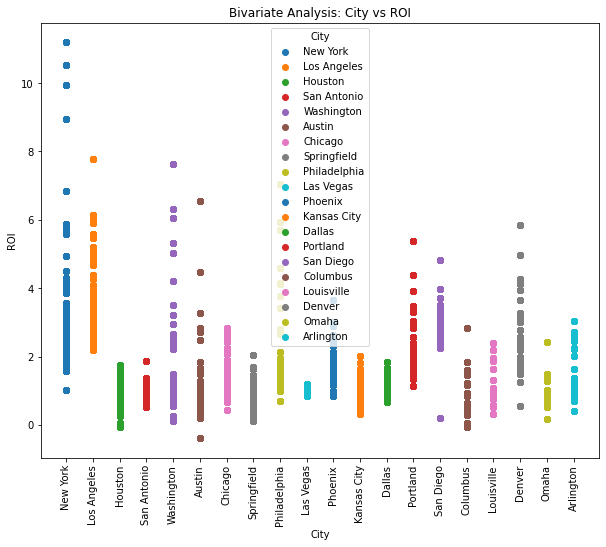

In [33]:
# calling the function plot_bivariate_analysis to plot bivaraite analysis of ROI against city

plot_bivariate_analysis(melted_df, 'City', 'ROI')

- The city with the highest ROI is NewYork. From the above analysis, we can conclude that properties in NewYork have the highest return on investment. Let's analyse the cities, states, metro and counties that have the highest ROI(return) but lowest CV(risk).

In [34]:
# Defined a function to get the top rows from the DataFrame

def get_top_rows(data, cv_column, roi_column, value_column, num_rows=10000):
    # Sort the DataFrame based on the value column in descending order,
    # coefficient of variance column in ascending order,
    # and return on investment column in descending order
    sorted_data = data.sort_values([value_column, cv_column, roi_column], ascending=[False, True, False])
    
    # Get the top N rows
    top_rows = sorted_data.head(num_rows)
    
    return top_rows# Usage example
top_rows = get_top_rows(melted_df, 'CV', 'ROI', 'value', num_rows=10000)

In [35]:
# Dispalying the top rows
top_rows

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
3174708,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-08-01,8558700.0
3161024,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-07-01,8550800.0
3147340,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-06-01,8501900.0
3188392,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-09-01,8497000.0
3133656,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-05-01,8412600.0
...,...,...,...,...,...,...,...,...,...,...,...
3222545,94507,97715,7000,Alamo,CA,San Francisco,Contra Costa,3.871755,0.325965,2015-11-01,1690000.0
1560851,92037,96602,893,San Diego,CA,San Diego,San Diego,3.410964,0.338853,2005-10-01,1690000.0
3549808,94127,97581,5798,San Francisco,CA,San Francisco,San Francisco,4.228665,0.379145,2017-11-01,1690000.0
2240464,11024,61986,10436,Great Neck,NY,New York,Nassau,2.117189,0.289201,2009-11-01,1689900.0


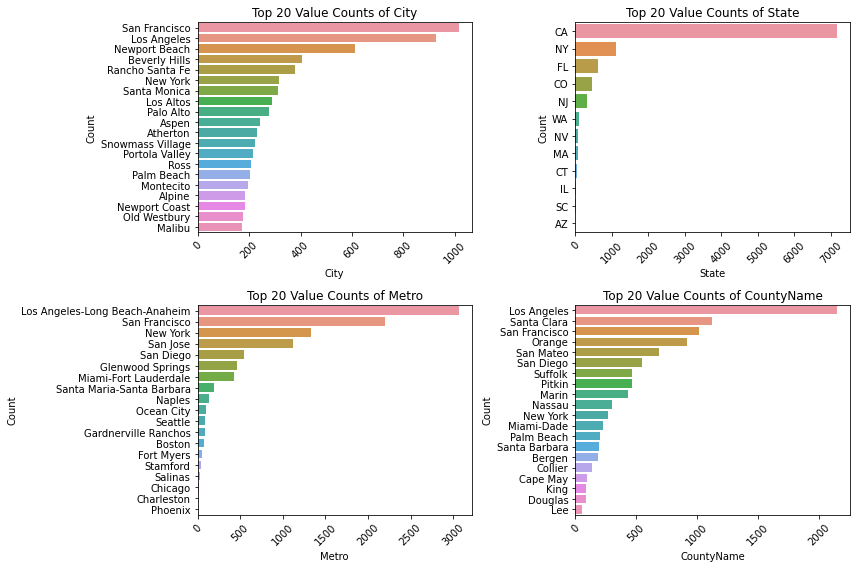

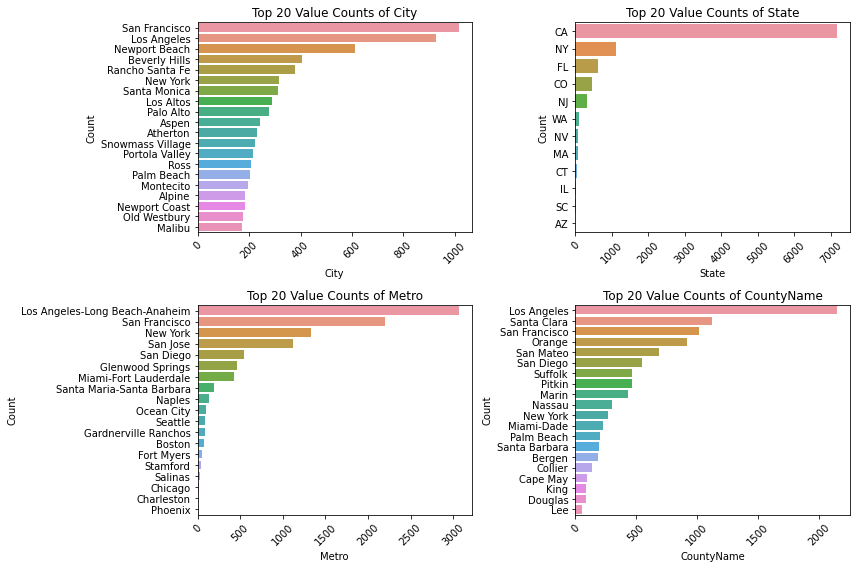

In [36]:
# Calling the 'plot_value_counts' function to create bar plots of value counts for specified columns
# using the 'top_rows' DataFrame as the dataset
plot_value_counts(top_rows, columns_list)

plot_value_counts(top_rows, columns_list)

The top 5 cities, states metro and counties with the highest return and lowest risk are:

 - cities: San Fransisco, Los Angeles, Newport beach, Beverly Hills and Rancho Santa Fe
 - states: CA, NY,FL, CO, NJ
 - metro: Los Angeles,San Fransisco,New York, San Jose, San Diego
 - counties: Los Angeles,Santa Clara, San Fransisco, Orange, San Mateo

## Multivariate Analysis 

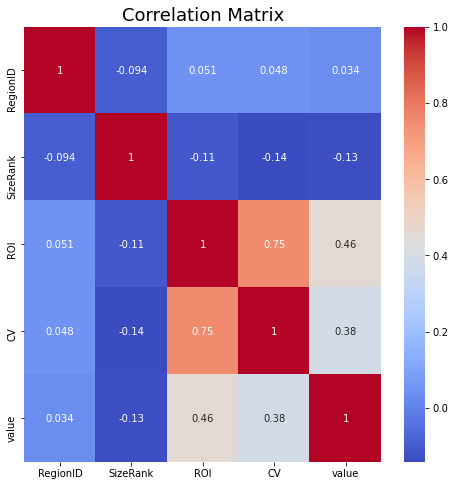

In [37]:
# Calculating the correlation matrix for the 'melted_df' DataFrame
corr_matrix = melted_df.corr()

# Created a figure and axis for the heatmap plot
fig, ax = plt.subplots(figsize=(8, 8))

# Generated a heatmap of the correlation matrix with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title for the heatmap plot
plt.title('Correlation Matrix', fontsize=18)

# Displayed the heatmap plot
plt.show()


- From the heat map above, we  observe that most of the features exhibit weak relationships with each other, except for ROI and CV, which display a strong relationship.

## Time Series Analysis

In [38]:
# Selected columns 'value' and 'time' from the 'melted_df' DataFrame
ts = melted_df[['value', 'time']]

# Converted the 'time' column to a datetime data type
ts['time'] = pd.to_datetime(ts['time'])

# Set the 'time' column as the index of the 'ts' DataFrame
ts.set_index('time', inplace=True)
ts

,value
time,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


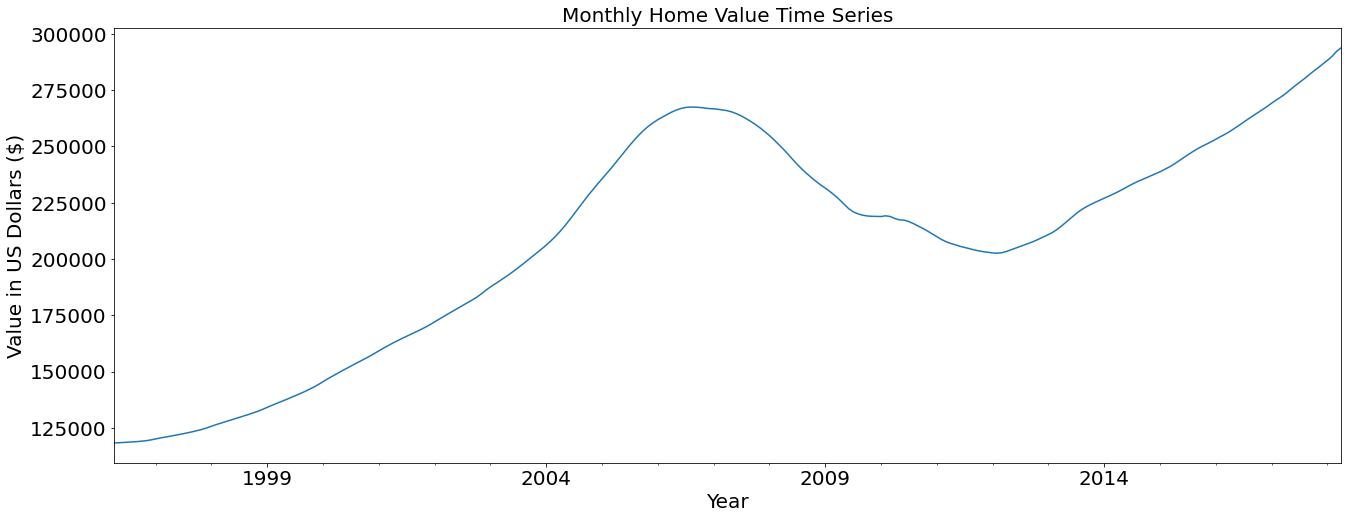

In [39]:
# Defined a function to plot monthly time series data
def plot_monthly_time_series(data, col):
    # Resampled the data to get the monthly mean and select the specified column
    time_series_monthly_value = data.resample('MS').mean()[col]
    
    # Created a line plot for the monthly time series data
    time_series_monthly_value.plot(figsize=(22, 8))
    
    # Set the plot title
    plt.title('Monthly Home Value Time Series', fontsize=20)
    
    # Set the y-axis label
    plt.ylabel('Value in US Dollars ($)', fontsize=20)
    
    # Set the x-axis label
    plt.xlabel('Year', fontsize=20)
    
    # Set font sizes for y-axis and x-axis tick labels
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    
    # Displayed the plot
    plt.show()

# Calling the function 
plot_monthly_time_series(ts, 'value')


- The plot of the housing prices indicates an overall upward trend from 1996 to around 2007, followed by a downward trend until approximately 2013, and then an upward trend again.

- The year 2007 marked the beginning of the global financial crisis, which had a significant impact on the housing market. The crisis was characterized by the bursting of the housing bubble and subsequent financial turmoil, leading to a decline in housing prices in various regions. The downward trend observed until 2013 can be attributed to the aftermath of the crisis, with factors such as reduced demand, stricter lending practices, and general economic uncertainty affecting the housing market negatively.

- However, after 2013, the housing market started to stabilize. Measures were taken to address the effects of the financial crisis, and economic conditions began to improve gradually. These improvements, along with factors such as increased consumer confidence, lower interest rates, and a recovery in the overall economy, contributed to the upward trend in housing prices

# Modelling 

## Preparing Data For Modelling

### Splitting the data

In [40]:
# split the data
df = ts.sort_index()

# Calculate the index to split the dataset
split_index = int(0.7 * len(df))

# Split the dataset
train_set = df.iloc[:split_index]
test_set = df.iloc[split_index:]

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 2538382
Test set size: 1087878


### Checking for stationarity

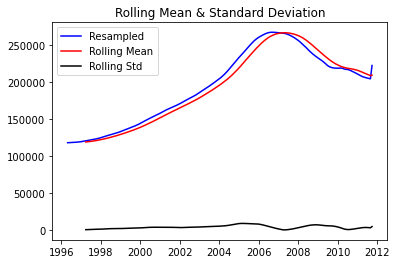

Results of Dickey-Fuller Test:
Test Statistic                  -0.361852
p-value                          0.916276
#Lags Used                       1.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [41]:
# Resampled the 'train_set' time series data to monthly frequency and fill missing values with forward fill
train_set = train_set.resample('M').mean().fillna(method='ffill')

# Defined a function to check the stationarity of a time series

def stationarity_check(TS):
    """
    Check the stationarity of a resampled time series using the Dickey-Fuller test and rolling statistics.
    
    Parameters:
    TS (pandas.Series): The time series to check for stationarity.
    
    Returns:
    None: Prints the Dickey-Fuller test results and plots the rolling mean and standard deviation.
    """
    # Calculated rolling statistics
    roll_mean = TS.rolling(window=12).mean()  # Rolling mean with a window size of 12 months
    roll_std = TS.rolling(window=12).std()    # Rolling standard deviation with a window size of 12 months
    
    # Performed the Dickey-Fuller test to check for stationarity
    dftest = adfuller(TS)
    
    # Plotted rolling statistics
    plt.plot(TS, color='blue', label='Resampled')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Called the 'stationarity_check' function to check stationarity of the 'train_set' time series
stationarity_check(train_set)


From the above plot we can see that the data is not stationary since the rolling mean is not constant over time. We can confirm this using the adfuller test. The p-value is greater than 0.05 thus we fail to reject the null hypothesis,thisalso indicates that  data is not stationary.

### Checking for seasonality 

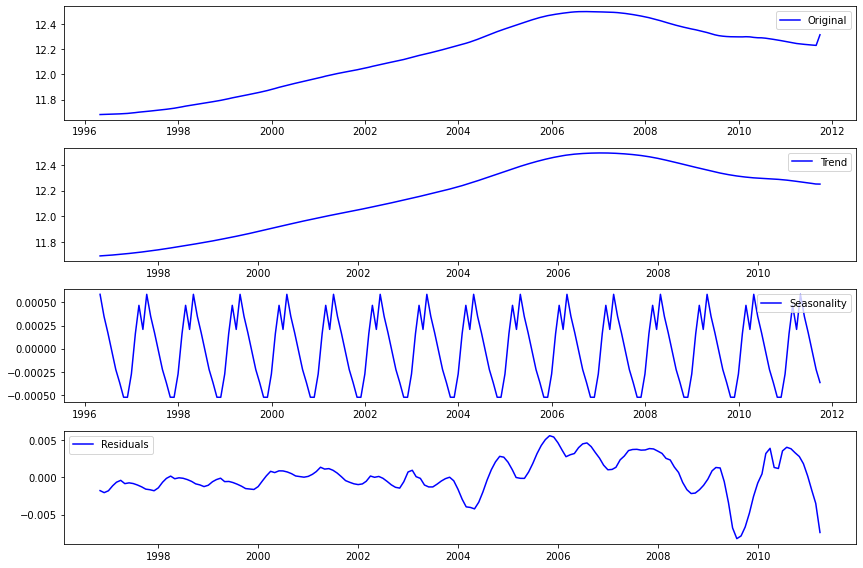

In [42]:
decomposition = seasonal_decompose(np.log(train_set),period=12)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(train_set), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

- Plotting this graphs makes it easier to identify a changing mean or variation in our time series data. From the decomposition plot it clearly shows an upward trend in our time series with seasonality and minimal variation.I will need to detrend the data because if seasonality and trend are part of the time series then there will be effects in the forecast value

### Detrending the data

Since the data has both trend and seasonal component, I used defferencing to detrend the time series data because it deals with both seasonality and trend

In [43]:
# Defined a function to calculate the differenced data and check stationarity
def calculate_data_diff(train_set,period):
    # Calculated the difference of the 'train_set' time series with the specified 'period'
    data_diff = train_set.diff(periods=period).dropna()
    return stationarity_check(data_diff)

 Checking for stationarity to see if the differencing by 1 year makes the data stationary.

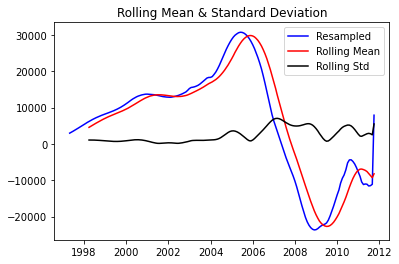

Results of Dickey-Fuller Test:
Test Statistic                  -2.514293
p-value                          0.112035
#Lags Used                      14.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


In [44]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 12 months
calculate_data_diff(train_set,12)

The p value is still greater than 0.05 showing that the data is not stationary.

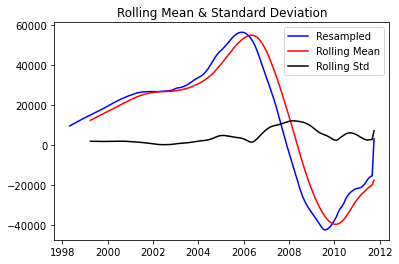

Results of Dickey-Fuller Test:
Test Statistic                  -2.786414
p-value                          0.060241
#Lags Used                       3.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [45]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 24 months

calculate_data_diff(train_set,24)

The p value is still greater than 0.05 showing that the data is not stationary.

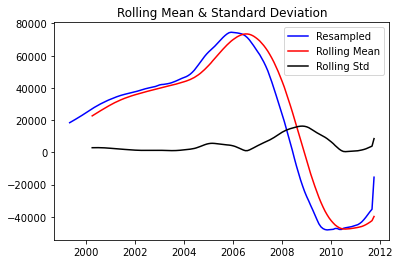

Results of Dickey-Fuller Test:
Test Statistic                  -2.473729
p-value                          0.121998
#Lags Used                       1.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


In [46]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 36 months

calculate_data_diff(train_set,36)

The p value is still greater than 0.05 showing that the data is not stationary

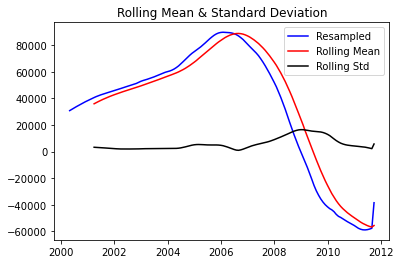

Results of Dickey-Fuller Test:
Test Statistic                  -3.123698
p-value                          0.024848
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [47]:
#  Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 48 months 
calculate_data_diff(train_set,48)

The p value is now less than 0.05 showing that the data is finally stationary.

In [48]:
# Calculated the difference of the 'train_set' time series with a period of 48 months
data_diff = train_set.diff(periods=48).dropna()

 ## Plotting ACF and PACF

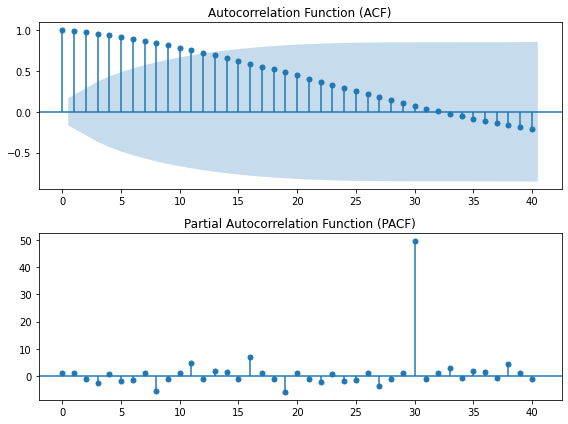

In [49]:

# Defined a function to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
def plot_acf_pacf(data):
    # Created a figure with two subplots (ACF and PACF)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    
    # Plot the Autocorrelation Function (ACF) with a maximum of 40 lags
    plot_acf(data, ax=axes[0], lags=40)
    
    # Plot the Partial Autocorrelation Function (PACF) with a maximum of 40 lags
    plot_pacf(data, ax=axes[1], lags=40)
    
    # Set titles for the subplots
    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12)
    
    # Adjust the layout of the subplots for better visualization
    plt.tight_layout()
    
    # Displayed the ACF and PACF plots
    plt.show()

# Calling the 'plot_acf_pacf' function to plot ACF and PACF for the 'data_diff' time series
plot_acf_pacf(data_diff)


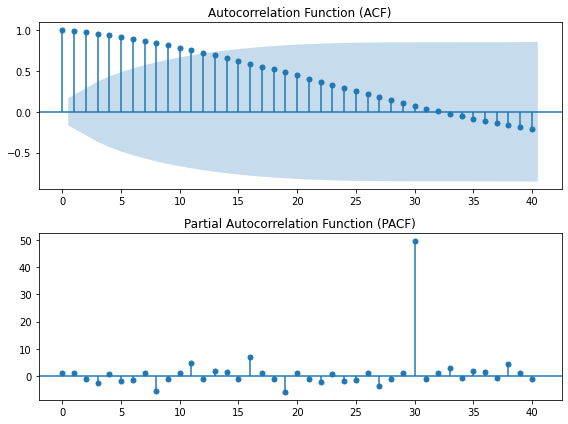

In [50]:
def plot_acf_pacf(data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    plot_acf(data, ax=axes[0], lags=40)
    plot_pacf(data, ax=axes[1], lags=40)
    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_acf_pacf(data_diff)

-From the acf plot, lags between 1 and 14 are in the statistically significant region meaning time periods within that span can affect present values. The plot shows a significant peak at a particular lag and decays exponentially afterward suggesting the presence of a seasonal pattern and the presence of an autoregressive (AR) process.

From the pacf plot it shows significant spikes at multiple lags but decays afterward, it suggests the presence of a mixed autoregressive-moving average (ARMA) process.

From the above we conclude that some of the models we'll fit are AR model and AR(I)MA mode